In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Clients

In [176]:
df_client = pd.read_csv('data/clients.csv', sep=';')
df_client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [177]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [178]:
df_client.describe()

,birth
count,8623.000000
mean,1977.816769
std,46.071018
min,-2001.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [179]:
df_client.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [180]:
df_client.drop_duplicates(subset='client_id', keep='first', inplace=True)

In [181]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.5+ KB


In [182]:
# print('='*50)
# print('Histogramme avant nettoyage')
# plt.boxplot(df_client['birth'])

# plt.title(f"Box plot répartion des {'birth'} avant nettoyage")
# plt.ylabel("{'birth'}")

# plt.show()


# # Isolation Forest
# clf = IsolationForest(contamination=0.0001, random_state=42)
# clf.fit(df_client[['birth']])

# df_client['anomaly_if'] = clf.predict(df_client[['birth']])
# print('='*50)
# print("Les anomalies :")
# print(df_client[df_client['anomaly_if'] == -1])

# # Supprimer les anomalies
# df_client = df_client[df_client['anomaly_if'] != -1]

# # histogramme après nettoyage
# print('='*50)
# print('Histogramme après nettoyage')
# plt.boxplot(df_client['birth'])

# plt.title(f"Box plot répartion des {'birth'} après nettoyage")
# plt.ylabel("{'birth'}")

# plt.show()

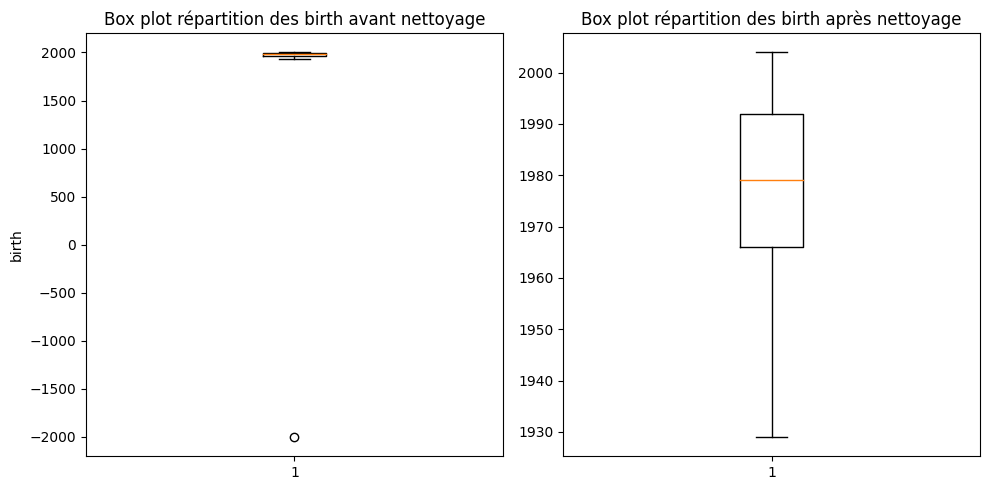

Les anomalies :
     client_id sex  birth  anomaly_if
8494      ct_1   m  -2001          -1


In [183]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Plot avant et après le nettoyage sur la même figure
plt.figure(figsize=(10, 5))  # Taille de la figure

# Première sous-figure (avant nettoyage)
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1ère position
plt.boxplot(df_client['birth'])
plt.title(f"Box plot répartition des {'birth'} avant nettoyage")
plt.ylabel("birth")

# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_client[['birth']])

df_client['anomaly_if'] = clf.predict(df_client[['birth']])

# Supprimer les anomalies
df_client_clean = df_client[df_client['anomaly_if'] != -1]

# Deuxième sous-figure (après nettoyage)
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème position
plt.boxplot(df_client_clean['birth'])
plt.title(f"Box plot répartition des {'birth'} après nettoyage")

# Affichage des deux sous-figures
plt.tight_layout()  # Pour éviter le chevauchement des labels
plt.show()

# Affichage des anomalies
print('='*50)
print("Les anomalies :")
print(df_client[df_client['anomaly_if'] == -1])


In [184]:
df_client.drop(columns='anomaly_if', inplace=True)

# Produits

In [185]:
df_produit = pd.read_csv('data/produits_sous-categorie.csv', sep=',')
df_produit.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


In [186]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


In [187]:
df_produit.drop_duplicates(subset='product_id', keep='first', inplace=True)

In [188]:
df_produit.isnull().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [189]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 154.1+ KB


Histogramme avant nettoyage


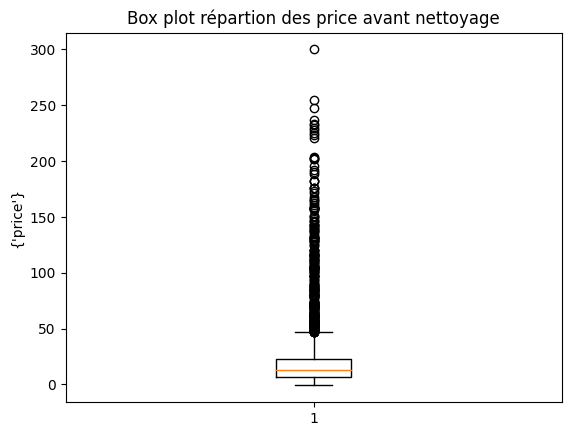

Les anomalies :
    product_id category        sub_category  price  stock_quantity  anomaly_if
947        2_2  Montres  Montres connectées  300.0              79          -1
Histogramme après nettoyage


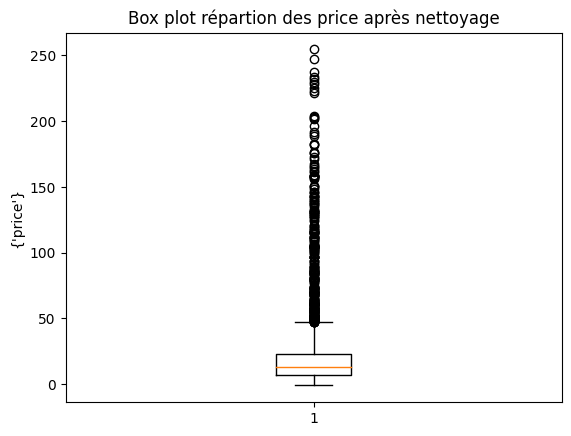

In [190]:
print('='*50)
print('Histogramme avant nettoyage')
plt.boxplot(df_produit['price'])

plt.title(f"Box plot répartion des {'price'} avant nettoyage")
plt.ylabel("{'price'}")

plt.show()


# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_produit[['price']])

df_produit['anomaly_if'] = clf.predict(df_produit[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit[df_produit['anomaly_if'] == -1])

# Supprimer les anomalies
df_produit_sans = df_produit[df_produit['anomaly_if'] != -1]

# histogramme après nettoyage
print('='*50)
print('Histogramme après nettoyage')
plt.boxplot(df_produit_sans['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

On peut voir une grande dispersion dans les prix des objets mais pas énormement de valeur aberrantes. Nous allons nous interresser à chaque valeur de catégories. 

In [191]:
df_produit_montre = df_produit[df_produit["category"] == "Montres"]
df_produit_vetement = df_produit[df_produit["category"] == "Vêtements"]
df_produit_accessoire = df_produit[df_produit["category"] == "Accessoires"]

### Category = montres

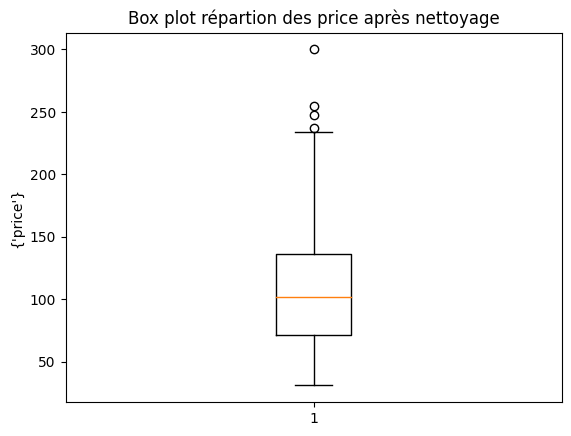

In [192]:
plt.boxplot(df_produit_montre['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [193]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_montre[['price']])

df_produit_montre['anomaly_if'] = clf.predict(df_produit_montre[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_montre[df_produit_montre['anomaly_if'] == -1])

Les anomalies :
    product_id category        sub_category  price  stock_quantity  anomaly_if
947        2_2  Montres  Montres connectées  300.0              79          -1


/tmp/ipykernel_1690/4027236614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_montre['anomaly_if'] = clf.predict(df_produit_montre[['price']])


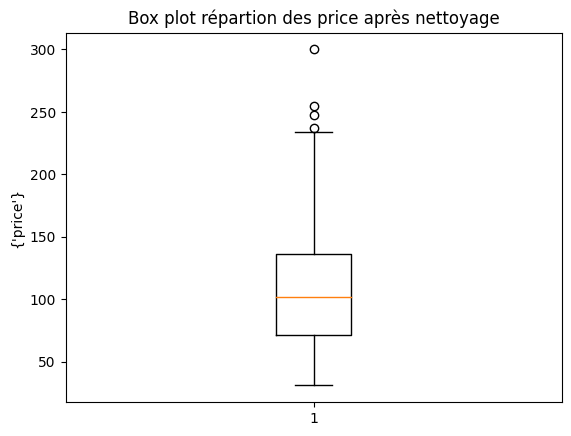

In [194]:
plt.boxplot(df_produit_montre['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

### Category = Vêtements

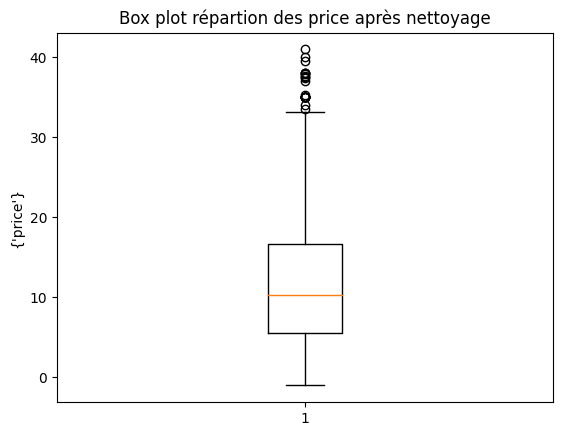

In [195]:
plt.boxplot(df_produit_vetement['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [196]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_vetement[['price']])

df_produit_vetement['anomaly_if'] = clf.predict(df_produit_vetement[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_vetement[df_produit_vetement['anomaly_if'] == -1])

Les anomalies :
     product_id   category sub_category  price  stock_quantity  anomaly_if
47       0_1629  Vêtements     T-shirts  40.99              91          -1
1360      0_494  Vêtements     T-shirts  39.58              13          -1
2809     0_2147  Vêtements     T-shirts  39.99              99          -1


/tmp/ipykernel_1690/334381810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_vetement['anomaly_if'] = clf.predict(df_produit_vetement[['price']])


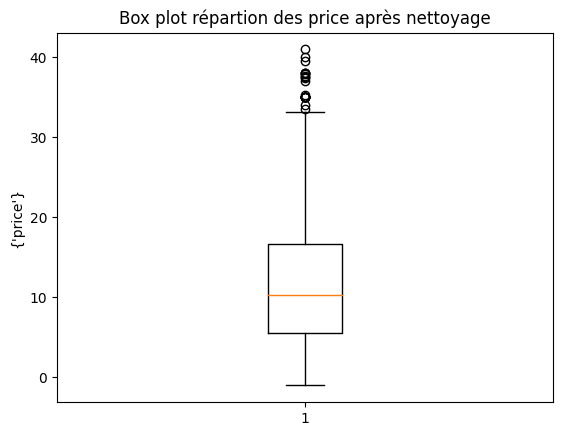

In [197]:
plt.boxplot(df_produit_vetement['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

### Category : accessoires

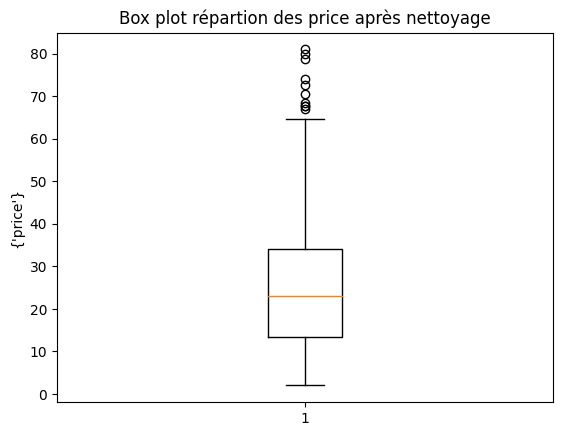

In [198]:
plt.boxplot(df_produit_accessoire['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [199]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_accessoire[['price']])

df_produit_accessoire['anomaly_if'] = clf.predict(df_produit_accessoire[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_accessoire[df_produit_accessoire['anomaly_if'] == -1])

Les anomalies :
    product_id     category sub_category  price  stock_quantity  anomaly_if
824       1_13  Accessoires  Sacs à main  80.99              85          -1


/tmp/ipykernel_1690/676669672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_accessoire['anomaly_if'] = clf.predict(df_produit_accessoire[['price']])


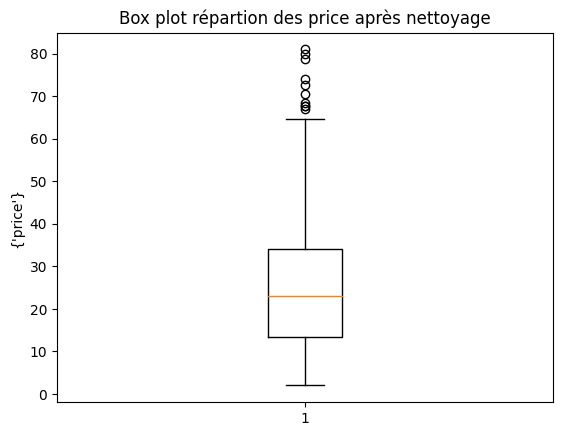

In [200]:
plt.boxplot(df_produit_accessoire['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [201]:
df_produit.drop(columns='anomaly_if', inplace=True)

# Ventes

In [202]:
df_ventes = pd.read_csv('data/ventes.csv', sep=',')
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [203]:
df_ventes.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [204]:
df_ventes.drop_duplicates(subset=['id_prod','client_id','date','session_id'], keep='first', inplace=True)

In [205]:
# print toutes les lignes qui commencent par 'test_' dans la colonne 'date'
df_ventes[df_ventes['date'].str.startswith('test_')].head(74)

,id_prod,date,session_id,client_id,quantity_sold
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,2
13745,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0,8
20470,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0,3
22347,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,9
26359,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1,9
26407,T_0,test_2021-03-01 02:30:02.237426,s_0,ct_0,9


In [206]:
# Pour chaque valeur de date, si elle commence par test_, on la remplace par la meme valeur à partir de la 5ème position    
df_ventes['date'] = df_ventes['date'].apply(lambda x: x[5:] if x.startswith('test_') else x)

In [207]:
# Convertir la colonne 'date' en datetime
df_ventes['date'] = pd.to_datetime(df_ventes['date'])
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_prod        336890 non-null  object        
 1   date           336890 non-null  datetime64[ns]
 2   session_id     336890 non-null  object        
 3   client_id      336890 non-null  object        
 4   quantity_sold  336890 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 15.4+ MB


Histogramme avant nettoyage


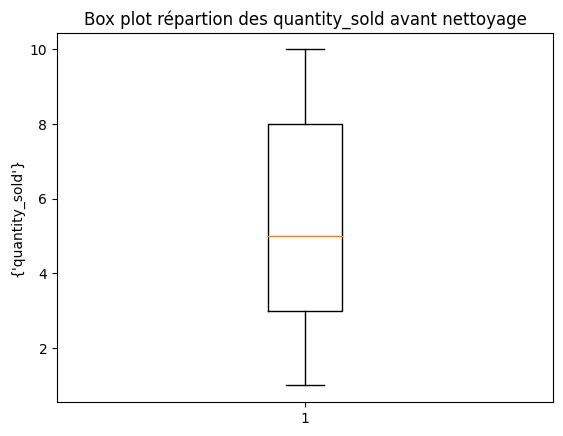

Les anomalies :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold, anomaly_if]
Index: []


In [208]:
print('='*50)
print('Histogramme avant nettoyage')
plt.boxplot(df_ventes['quantity_sold'])

plt.title(f"Box plot répartion des {'quantity_sold'} avant nettoyage")
plt.ylabel("{'quantity_sold'}")

plt.show()


# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_ventes[['quantity_sold']])

df_ventes['anomaly_if'] = clf.predict(df_ventes[['quantity_sold']])
print('='*50)
print("Les anomalies :")
print(df_ventes[df_ventes['anomaly_if'] == -1])

In [209]:
# Drop colonne 'anomaly_if'
df_ventes.drop(columns='anomaly_if', inplace=True)

# Jointure

In [210]:
df_ventes.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [211]:
df_produit.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


In [212]:
df_client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### Je commmence par produits pour conserver tous les produits et supprimer les produits qui pourraient etre vendu mais n'existe pas dans la table produit

In [213]:
df_ventes.rename(columns={'id_prod':'product_id'}, inplace=True)

In [214]:
df_ventes.head()

,product_id,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [215]:
df_produit_ventes = pd.merge(df_produit, df_ventes, on='product_id', how='left')

In [216]:
df_produit_ventes.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0


In [217]:
df = pd.merge(df_produit_ventes, df_client, on='client_id', how='left')
df.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold,sex,birth
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0,m,1973.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0,f,1990.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0,f,1977.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0,f,1932.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0,f,1989.0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336809 entries, 0 to 336808
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   product_id      336809 non-null  object        
 1   category        336809 non-null  object        
 2   sub_category    336809 non-null  object        
 3   price           336809 non-null  float64       
 4   stock_quantity  336809 non-null  int64         
 5   date            336787 non-null  datetime64[ns]
 6   session_id      336787 non-null  object        
 7   client_id       336787 non-null  object        
 8   quantity_sold   336787 non-null  float64       
 9   sex             336787 non-null  object        
 10  birth           336787 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 30.8+ MB


In [219]:
df.isnull().sum()

product_id         0
category           0
sub_category       0
price              0
stock_quantity     0
date              22
session_id        22
client_id         22
quantity_sold     22
sex               22
birth             22
dtype: int64

# Analyse de la table finale 

In [220]:
# Je récupére les lignes où il y est des valeurs nulles et je les affichent toutes 
df[df.isnull().any(axis=1)].head(5)

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold,sex,birth
19685,0_1016,Vêtements,T-shirts,35.06,96,NaT,NaN,NaN,NaN,NaN,NaN
31123,0_1780,Vêtements,T-shirts,1.67,53,NaT,NaN,NaN,NaN,NaN,NaN
80972,0_1062,Vêtements,T-shirts,20.08,2,NaT,NaN,NaN,NaN,NaN,NaN
88298,0_1119,Vêtements,T-shirts,2.99,45,NaT,NaN,NaN,NaN,NaN,NaN
90113,0_1014,Vêtements,T-shirts,1.15,91,NaT,NaN,NaN,NaN,NaN,NaN


In [221]:
# Afficher le produit avec l'id 'T_0'
df_produit[df_produit['product_id'] == 'T_0']

,product_id,category,sub_category,price,stock_quantity
731,T_0,Vêtements,T-shirts,-1.0,89


J'ai déjà une information sur ce produit qui me pose problème, je vais regarder le nombre de fois qu'il apparait dans vente. Je soupçonne le fait qu'il apparaiseent plusieurs fois.

In [222]:
df_ventes[df_ventes['product_id'] == 'T_0'].head(5)

,product_id,date,session_id,client_id,quantity_sold
1431,T_0,2021-03-01 02:30:02.237420,s_0,ct_1,3
2365,T_0,2021-03-01 02:30:02.237446,s_0,ct_1,1
2895,T_0,2021-03-01 02:30:02.237414,s_0,ct_1,9
5955,T_0,2021-03-01 02:30:02.237441,s_0,ct_0,3
7283,T_0,2021-03-01 02:30:02.237434,s_0,ct_1,2


In [223]:
df_client[df_client['client_id'] == 'ct_1']

,client_id,sex,birth
8494,ct_1,m,-2001


J'ai un second problème, j'ai des ventes pour des clients ne sont pas enregistrés également. Notament pour ct_1. Je vais choisir de le conserver quand meme, j'aurais pu faire une jointure à droite pour conserver les ventes avec des clients connus, mais je trouve plus important d'avoir une vue sur le chiffre d'affaire et à ce moment là, pourquoi pas faire une somme de tous les clients inconnus. 

Les autres produits où j'ai dees valeurs inconnues sont les produits qui n'ont pas de ventes associées. 

In [224]:
df = df[df['client_id'] != 'ct_1']
df.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold,sex,birth
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0,m,1973.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0,f,1990.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0,f,1977.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0,f,1932.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0,f,1989.0


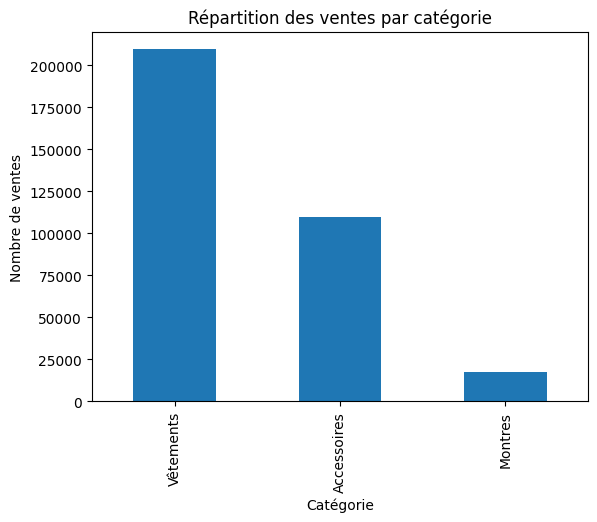

In [225]:
# # Plot qui montre la répartition des ventes par catégorie
# df['category'].value_counts().plot(kind='bar')

# plt.title('Répartition des ventes par catégorie')
# plt.ylabel('Nombre de ventes')
# plt.xlabel('Catégorie')

# plt.show()

# # Créer un tableau croisé dynamique pour obtenir le nombre de ventes par catégorie et sexe
# ventes_par_categorie_sexe = df.pivot_table(index='category', columns='sexe', aggfunc='size', fill_value=0)

# # Plot du diagramme en barres empilées
# ventes_par_categorie_sexe.plot(kind='bar', stacked=True)

# # Ajouter les titres et labels
# plt.title('Répartition des ventes par catégorie et par sexe')
# plt.ylabel('Nombre de ventes')
# plt.xlabel('Catégorie')

# # Afficher le graphe
# plt.show()

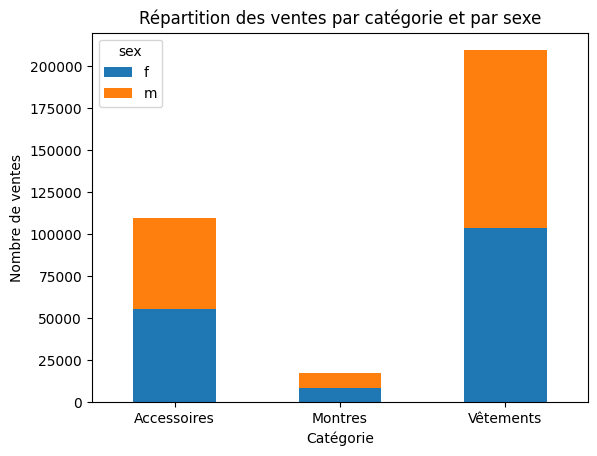

In [234]:
ventes_par_categorie_sexe = df.pivot_table(index='category', columns='sex', aggfunc='size', fill_value=0)

ventes_par_categorie_sexe.plot(kind='bar', stacked=True)

# Ajouter les titres et labels
plt.title('Répartition des ventes par catégorie et par sexe')
plt.ylabel('Nombre de ventes')
plt.xlabel('Catégorie')
# afficher les legende x a l'horizontale
plt.xticks(rotation=0)

plt.show()

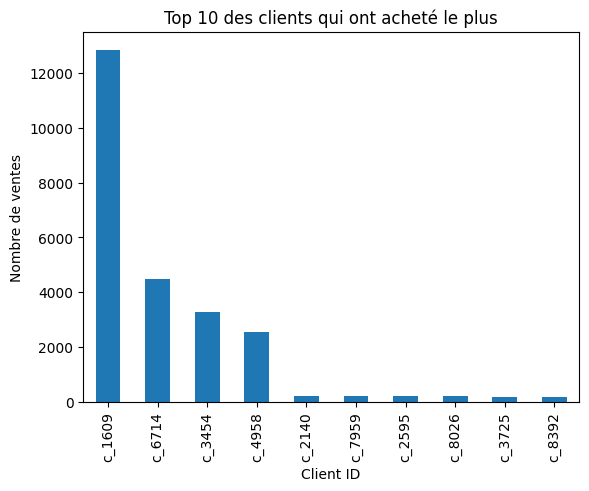

In [226]:
# Plot des clients qui ont acheté le plus
df['client_id'].value_counts().head(10).plot(kind='bar')

plt.title('Top 10 des clients qui ont acheté le plus')
plt.ylabel('Nombre de ventes')
plt.xlabel('Client ID')

plt.show()

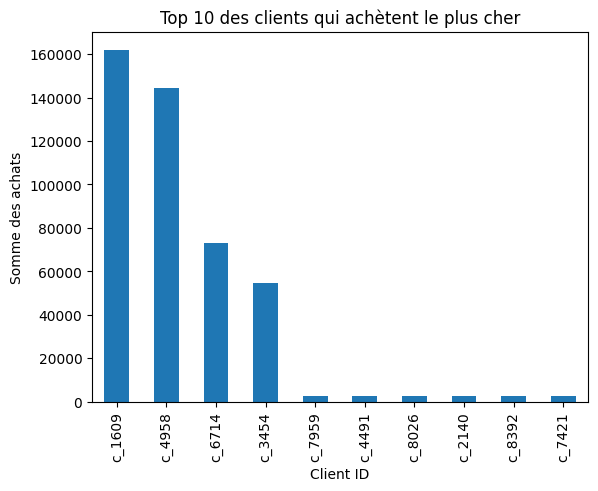

In [227]:
# Plot pour les clients qui achètent le plus "cher"
df['price'].groupby(df['client_id']).sum().sort_values(ascending=False).head(10).plot(kind='bar')   

plt.title('Top 10 des clients qui achètent le plus cher')
plt.ylabel('Somme des achats')
plt.xlabel('Client ID')

plt.show()

In [228]:
# Créeer une colonne age pour chaque client en fonction de son année de naissance
df['age'] = 2024 - df['birth']

In [229]:
df.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold,sex,birth,age
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0,m,1973.0,51.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0,f,1990.0,34.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0,f,1977.0,47.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0,f,1932.0,92.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0,f,1989.0,35.0


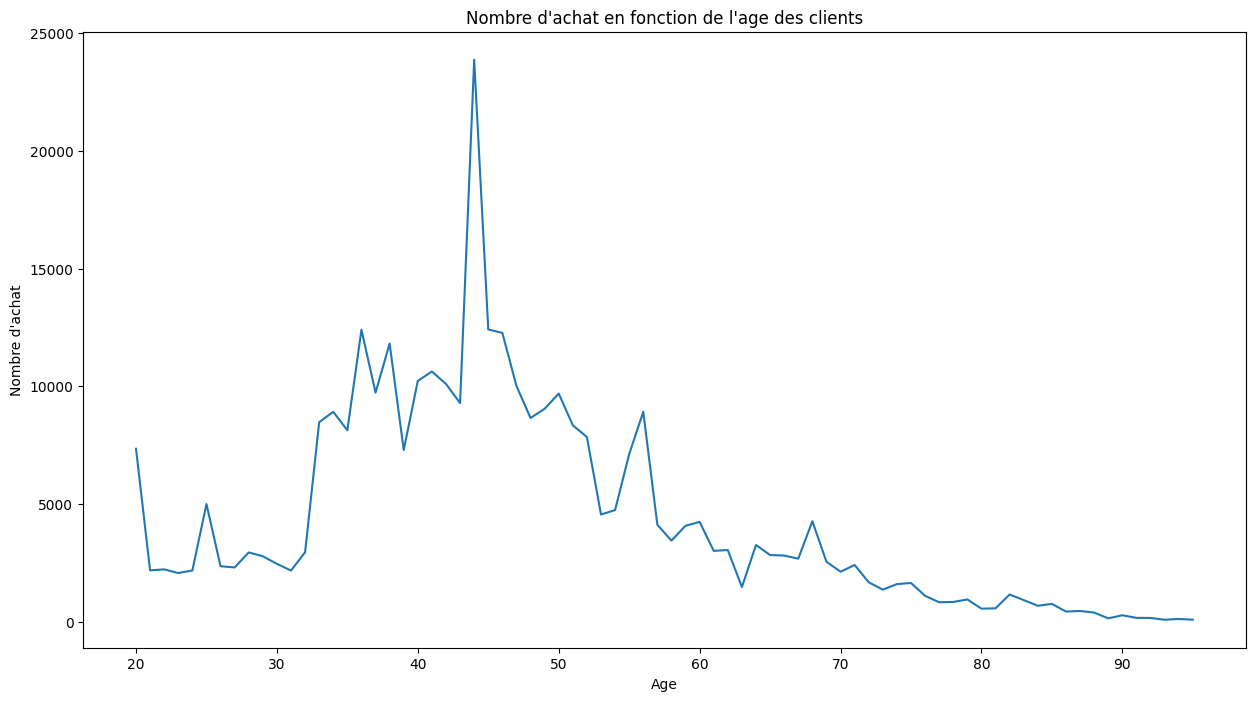

In [230]:
# Créer un graphique  du nombre d'achat en focntion de l'age des clients order by age croissant 
plt.figure(figsize=(15,8))
df['age'].value_counts().sort_index().plot(kind='line')

plt.title("Nombre d'achat en fonction de l'age des clients")
plt.ylabel("Nombre d'achat")
plt.xlabel("Age")

plt.show()

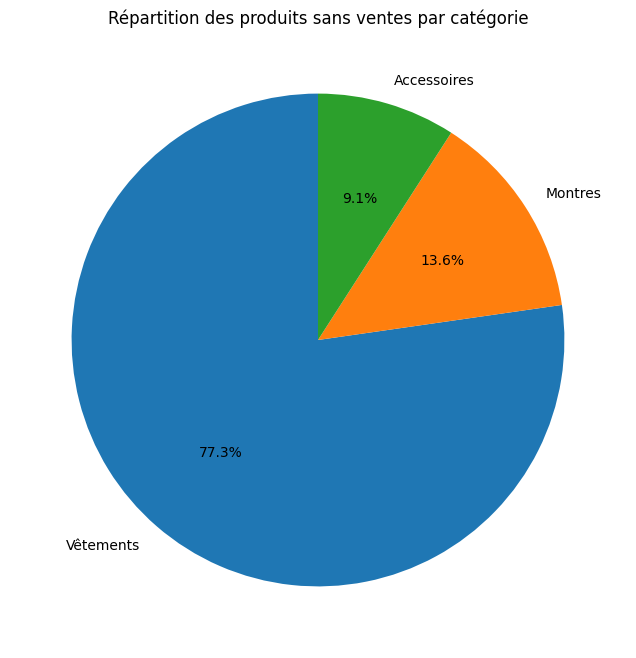

In [242]:
# Filtrer les produits sans ventes
produits_sans_ventes = df[df['client_id'].isnull()]

# Créer un graphique en secteurs avec les pourcentages
produits_sans_ventes['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Ajouter le titre
plt.title('Répartition des produits sans ventes par catégorie')

# Supprimer l'étiquette de l'axe Y (inutile pour un camembert)
plt.ylabel('')

# Afficher le graphique
plt.show()


In [240]:
# Export en CSV 
df.to_csv('data/output.csv', index=False)